In [1]:
import tensorflow as tf
import matplotlib.pyplot as plt
import numpy as np
import pandas as pd
import seaborn as sns
from sklearn.ensemble import RandomForestClassifier

import joblib  # model 저장용

In [2]:
(train_set, train_label), (test_set, test_label) = tf.keras.datasets.mnist.load_data()

In [3]:
train_set = train_set.reshape(len(train_set), -1)
test_set = test_set.reshape(len(test_set), -1)

In [4]:
clf = RandomForestClassifier()
clf.fit(train_set, train_label)

RandomForestClassifier()

In [5]:
pred = clf.predict(test_set)

In [9]:
confusion_matrix = [[0 for i in range(10)] for i in range(10)]

In [10]:
for i in range(len(test_set)):
    r = test_label[i]
    p = pred[i]
    
    confusion_matrix[r][p] += 1

In [11]:
confusion_matrix

[[968, 1, 1, 0, 0, 1, 4, 1, 3, 1],
 [0, 1123, 3, 3, 1, 2, 2, 0, 1, 0],
 [6, 0, 999, 6, 3, 0, 5, 8, 5, 0],
 [0, 0, 11, 967, 0, 12, 0, 9, 8, 3],
 [1, 0, 2, 0, 956, 0, 5, 0, 5, 13],
 [3, 1, 1, 14, 5, 855, 5, 2, 5, 1],
 [5, 3, 0, 0, 4, 5, 937, 0, 4, 0],
 [1, 5, 19, 1, 0, 0, 0, 985, 3, 14],
 [5, 0, 4, 7, 4, 5, 5, 3, 930, 11],
 [5, 5, 2, 8, 10, 3, 1, 4, 9, 962]]

# 시각화

In [16]:
x = [i for i in range(10)]

df = pd.DataFrame(confusion_matrix, index=x, columns=x)

df["sum"] = df.sum(axis=0)

df = df.iloc[:, :10] / df["sum"]

df

,0,1,2,3,4,5,6,7,8,9
0,0.973843,0.000879,0.000960,0.000000,0.000000,0.001133,0.004149,0.000988,0.003083,0.000995
1,0.000000,0.986819,0.002879,0.002982,0.001017,0.002265,0.002075,0.000000,0.001028,0.000000
2,0.006036,0.000000,0.958733,0.005964,0.003052,0.000000,0.005187,0.007905,0.005139,0.000000
3,0.000000,0.000000,0.010557,0.961233,0.000000,0.013590,0.000000,0.008893,0.008222,0.002985
4,0.001006,0.000000,0.001919,0.000000,0.972533,0.000000,0.005187,0.000000,0.005139,0.012935
5,0.003018,0.000879,0.000960,0.013917,0.005086,0.968290,0.005187,0.001976,0.005139,0.000995
6,0.005030,0.002636,0.000000,0.000000,0.004069,0.005663,0.971992,0.000000,0.004111,0.000000
7,0.001006,0.004394,0.018234,0.000994,0.000000,0.000000,0.000000,0.973320,0.003083,0.013930
8,0.005030,0.000000,0.003839,0.006958,0.004069,0.005663,0.005187,0.002964,0.955807,0.010945
9,0.005030,0.004394,0.001919,0.007952,0.010173,0.003398,0.001037,0.003953,0.009250,0.957214


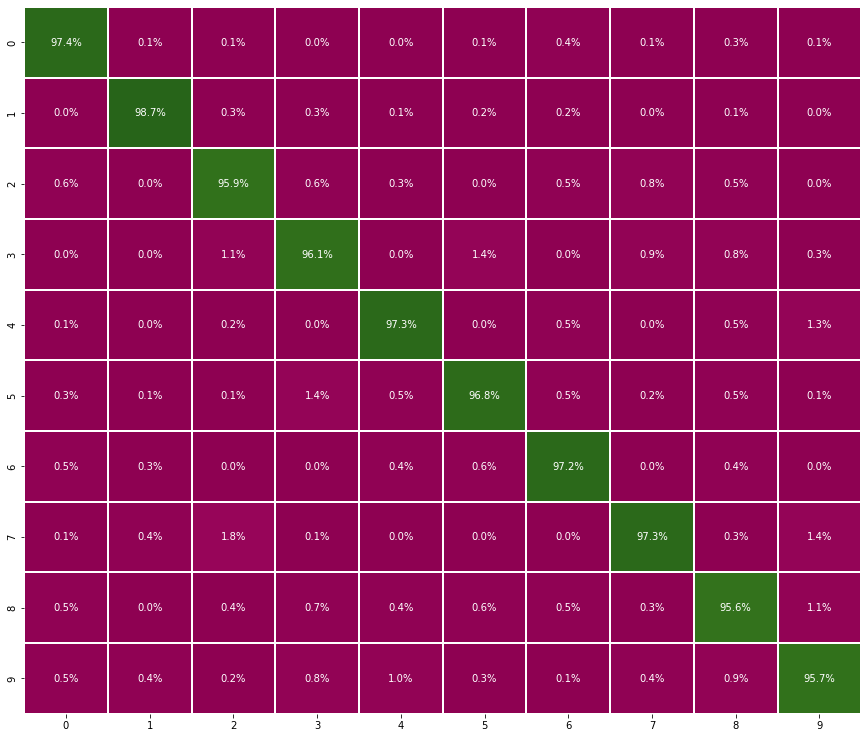

In [17]:
fig, ax = plt.subplots(figsize=(15,13))
ax = sns.heatmap(df,
                 cmap="PiYG",              # cmap Color
                 cbar=False,
                 annot=True,               # Value Text
                 fmt=".1%",                  # Value type (interge = "d")
                 linewidths=2)